# ASR Assignment 2019-20

This notebook has been provided as a template to get you started on the assignment.  Feel free to use it for your development, or do your development directly in Python.

You can find a full description of the assignment [here](http://www.inf.ed.ac.uk/teaching/courses/asr/2019-20/coursework.pdf).

You are provided with two Python modules `observation_model.py` and `wer.py`.  The first was described in [Lab 3](https://github.com/Ore-an/asr_lab3/blob/master/asr_lab3.ipynb).  The second can be used to compute the number of substitution, deletion and insertion errors between ASR output and a reference text.

It can be used as follows:

```python
import wer

my_refence = 'A B C'
my_output = 'A C C D'

wer.compute_alignment_errors(my_reference, my_output)
```

This produces a tuple $(s,d,i)$ giving counts of substitution,
deletion and insertion errors respectively - in this example (1, 0, 1).  The function accepts either two strings, as in the example above, or two lists.  Matching is case sensitive.

## Template code

Assuming that you have already made a function to generate an WFST, `create_wfst()` and a decoder class, `MyViterbiDecoder`, you can perform recognition on all the audio files as follows:


In [1]:
import glob
import os
import wer
import observation_model
import openfst_python as fst
import time
from experiment import *
from tqdm import tqdm_notebook as tqdm
import pdb
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import cProfile

%reload_ext autoreload
%autoreload 2

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## Task 1 - Initial systems

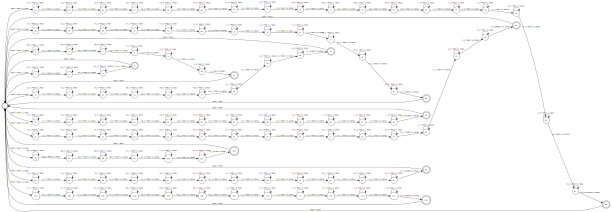

In [19]:
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
f

In [ ]:
time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words = run_exp(f,num_test = 180)

In [ ]:
print(time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words)

## Task2 - System tuning

#### varying the self-loop probabilities

In [11]:
# array of different self loop probabilities
self_prob = np.linspace(0.2,0.8,num=3)
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 875.0778748989105, 
    Number of forward computations: 20709776,
    Number of states and arcs: 116 230,
    Number of errors 1808 ((2, 0, 2)) in 2177 words .
    




    Run time: 832.486279964447, 
    Number of forward computations: 20664335,
    Number of states and arcs: 116 230,
    Number of errors 1557 ((1, 1, 1)) in 2177 words .
    




    Run time: 828.6869370937347, 
    Number of forward computations: 20629020,
    Number of states and arcs: 116 230,
    Number of errors 1451 ((1, 1, 0)) in 2177 words .
    


In [12]:
save_obj(results_sp,"task2_tranp_result")

####  final probabilities

In [ ]:
# array of different final probabilities
final_prob = np.linspace(0.1,0.8,num=3)
results_fp = defaultdict(list)
for fp in self_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(finalfefiejaif = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_fp,"task2_finalp_result")

#### using transitions to each word based on unigram word probabilities (see advanced task)

#### add sil to lexicon

In [ ]:
# compare lexicon with silence and without
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
results_lex_sil = defaultdict(list)

time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_lex_sil['lexicon_sil'] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_lex_sil,"task2_sil_result")

## Task3 - Pruning

In [ ]:
# compare a range fo different pruning thresholds
thresholds = np.linspace(0.1,0.99,num=5)
results_prun = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_prun[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_prun,"task3_pruning_result")

In [ ]:
results_prun = load_obj("task3_pruning_result")
results_prun

## Task4 - Advanced topics

#### tree structure

In [ ]:
results_strc = defaultdict(list)

f = MyWFST().create_wfst_word_output(tree_struc= True)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_strc[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_strc,"task4_tree_result")

#### weight look ahead

In [ ]:
thresholds = np.linspace(0.1,0.99,num=5)
results_push = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_push = True)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_push[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_push,"task4_look_ahead")

#### different language models

In [ ]:
# different N gram language models
ngrams = ['unigram','bigram']
results_lm = defaultdict(list)

for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_lm,"task4_lm_result")